# 1 ) Importing Various Modules.

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


<a id="content2"></a>
## 2 ) Preparing the Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/"My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 14583.docx
 14583.docx.gdoc
'1547439903130_Android OS Dev Practical1'
'1547439903130_Android OS Dev Practical1.gdoc'
'15 Gobal Issues and Problems R1 [Compatibility Mode].gdoc'
'15 Gobal Issues and Problems R1 [Compatibility Mode].pdf'
'1. Download and Installing the Cloudera VM Instructions.gdoc'
'1. Download and Installing the Cloudera VM Instructions.pdf'
 20160407_131147.mp4
 23feb.R
 5_6060010846757584974.gdoc
 5_6134265157653627177.pdf
 5_6210650158875541663.42.pdf
 AAM.docx
'AC Fundamentals.gdoc'
 ADBMS-QBB-1.xlsx
 AI-Intro_L1.gdoc
 AI-Intro_L1.pdf
 AIProj.gdoc
'AI Report.gdoc'
'AOS Synopsis.gdoc'
'BA_1e_Online_Data_ Files.rar'
'Barriers to Communication.pptx.gslides'
 Brexit_Eco
 Camera
 CarPrice_Assignment.csv
'Central Bank.gdoc'
'COI PPT.gdoc'
'Colab Notebooks'
'Comparison of Methods for Image Recognition and Classification in R.gdoc'
'Computer Rep

# 2.1) Making the functions to get the training and validation set from the Images

In [0]:
X=[]
Z=[]
IMG_SIZE=150

AGRICULTURAL_DIR='drive/My Drive/UCMerced_LandUse/Images/agricultural' 
AIRPLANE_DIR='drive/My Drive/UCMerced_LandUse/Images/airplane'
BASEBALLDIAMOND_DIR='drive/My Drive/UCMerced_LandUse/Images/baseballdiamond'
BEACH_DIR='drive/My Drive/UCMerced_LandUse/Images/beach'
BUILDINGS_DIR='drive/My Drive/UCMerced_LandUse/Images/buildings'
CHAPARRAL_DIR='drive/My Drive/UCMerced_LandUse/Images/chaparral'
DENSERESIDENTIAL_DIR='drive/My Drive/UCMerced_LandUse/Images/denseresidential'
FOREST_DIR='drive/My Drive/UCMerced_LandUse/Images/forest'
FREEWAY_DIR='drive/My Drive/UCMerced_LandUse/Images/freeway'
GOLFCOURSE_DIR='drive/My Drive/UCMerced_LandUse/Images/golfcourse'
HARBOR_DIR='drive/My Drive/UCMerced_LandUse/Images/harbor'
INTERSECTION_DIR='drive/My Drive/UCMerced_LandUse/Images/intersection'
MEDIUMRESIDENTIAL_DIR='drive/My Drive/UCMerced_LandUse/Images/mediumresidential'
MOBILEHOMEPARK_DIR='drive/My Drive/UCMerced_LandUse/Images/mobilehomepark'
OVERPASS_DIR='drive/My Drive/UCMerced_LandUse/Images/overpass'
PARKINGLOT_DIR='drive/My Drive/UCMerced_LandUse/Images/parkinglot'
RIVER_DIR='drive/My Drive/UCMerced_LandUse/Images/river'
RUNWAY_DIR='drive/My Drive/UCMerced_LandUse/Images/runway'
SPARSERESIDENTIAL_DIR='drive/My Drive/UCMerced_LandUse/Images/sparseresidential'
STORAGETANKS_DIR='drive/My Drive/UCMerced_LandUse/Images/storagetanks'
TENNISCOURT_DIR='drive/My Drive/UCMerced_LandUse/Images/tenniscourt'

In [0]:
def assign_label(img,image_type):
    return image_type

In [0]:
def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
from tqdm import tqdm

In [0]:
make_train_data('Agricultural',AGRICULTURAL_DIR)
print(len(X))

100%|██████████| 100/100 [01:21<00:00,  1.27it/s]

100


In [0]:
make_train_data('Airplane',AIRPLANE_DIR)
print(len(X))

100%|██████████| 100/100 [01:20<00:00,  1.29it/s]

200


In [0]:
make_train_data('Baseball Diamond',BASEBALLDIAMOND_DIR)
print(len(X))

100%|██████████| 101/101 [01:19<00:00,  1.26it/s]

301


In [0]:
make_train_data('Beach',BEACH_DIR)
print(len(X))

100%|██████████| 100/100 [01:20<00:00,  1.32it/s]

401


In [0]:
make_train_data('Buildings',BUILDINGS_DIR)
print(len(X))

100%|██████████| 100/100 [01:18<00:00,  1.24it/s]

501


In [0]:
make_train_data('Chaparral',CHAPARRAL_DIR)
print(len(X))

100%|██████████| 100/100 [01:14<00:00,  1.59it/s]

601


In [0]:
make_train_data('Dense Residential',DENSERESIDENTIAL_DIR)
print(len(X))

100%|██████████| 100/100 [01:28<00:00,  1.31it/s]

701


In [0]:
make_train_data('Forest',FOREST_DIR)
print(len(X))

100%|██████████| 100/100 [01:11<00:00,  1.49it/s]

801


In [0]:
make_train_data('Freeway',FREEWAY_DIR)
print(len(X))

100%|██████████| 100/100 [01:12<00:00,  1.42it/s]

901


In [0]:
make_train_data('Golfcourse',GOLFCOURSE_DIR)
print(len(X))

100%|██████████| 100/100 [01:12<00:00,  1.43it/s]

1001


In [0]:
make_train_data('Harbor',HARBOR_DIR)
print(len(X))

100%|██████████| 100/100 [01:10<00:00,  1.39it/s]

1101


In [0]:
make_train_data('Intersection',INTERSECTION_DIR)
print(len(X))

100%|██████████| 100/100 [01:08<00:00,  1.62it/s]

1201


In [0]:
make_train_data('Medium Residential',MEDIUMRESIDENTIAL_DIR)
print(len(X))

100%|██████████| 102/102 [01:11<00:00,  1.55it/s]

1303


In [0]:
make_train_data('Mobile Home Park',MOBILEHOMEPARK_DIR)
print(len(X))

100%|██████████| 100/100 [01:06<00:00,  1.65it/s]

1403


In [0]:
make_train_data('Overpass',OVERPASS_DIR)
print(len(X))

100%|██████████| 100/100 [01:09<00:00,  1.43it/s]

1503


In [0]:
make_train_data('Parking Lot',PARKINGLOT_DIR)
print(len(X))

100%|██████████| 100/100 [01:08<00:00,  1.51it/s]

1603


In [0]:
make_train_data('River',RIVER_DIR)
print(len(X))

100%|██████████| 100/100 [01:10<00:00,  1.59it/s]

1703


In [0]:
make_train_data('Runway',RUNWAY_DIR)
print(len(X))

100%|██████████| 100/100 [01:11<00:00,  1.42it/s]

1803


In [0]:
make_train_data('Sparse Residential',SPARSERESIDENTIAL_DIR)
print(len(X))

100%|██████████| 100/100 [01:10<00:00,  1.47it/s]

1903


In [0]:
make_train_data('Storage Tanks',STORAGETANKS_DIR)
print(len(X))

100%|██████████| 101/101 [01:15<00:00,  1.54it/s]

2004


In [0]:
make_train_data('Tennis Court',TENNISCOURT_DIR)
print(len(X))

100%|██████████| 100/100 [01:12<00:00,  1.51s/it]

2104


# 2.3 ) Label Encoding the Y array (i.e. agricultural->0, airplane->1 etc...) & then One Hot Encoding

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,21)
X=np.array(X)
X=X/255

# 2.4) Splitting into Training and Validation Sets

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# 2.5 ) Setting the Random Seeds

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

<a id="content3"></a>
## 3 ) Modelling

# 3.1 ) Building the ConvNet Model

In [0]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation = "softmax"))

# 3.2 ) Using a LR Annealer

In [0]:
batch_size=21
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# 3.3 ) Data Augmentation to prevent Overfitting


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# 3.4 ) Compiling the Keras Model & Summary

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# **3.5) Model Summary**

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

# 3.6 ) Fitting on the Training set and making predcitons on the Validation set

In [0]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), 
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))




Epoch 1/50





75/75 [==============================] - 22s 287ms/step - loss: 0.1872 - acc: 0.9522 - val_loss: 0.1850 - val_acc: 0.9521
Epoch 2/50
75/75 [==============================] - 8s 105ms/step - loss: 0.1721 - acc: 0.9524 - val_loss: 0.1600 - val_acc: 0.9504
Epoch 3/50
75/75 [==============================] - 8s 106ms/step - loss: 0.1558 - acc: 0.9525 - val_loss: 0.1383 - val_acc: 0.9545
Epoch 4/50
75/75 [==============================] - 8s 104ms/step - loss: 0.1395 - acc: 0.9555 - val_loss: 0.1179 - val_acc: 0.9598
Epoch 5/50
75/75 [==============================] - 8s 103ms/step - loss: 0.1283 - acc: 0.9578 - val_loss: 0.1386 - val_acc: 0.9558
Epoch 6/50
75/75 [==============================] - 8s 104ms/step - loss: 0.1191 - acc: 0.9592 - val_loss: 0.1070 - val_acc: 0.9616
Epoch 7/50
75/75 [==============================] - 8s 106ms/step - loss: 0.1046 - acc: 0.9622 - val_loss: 0.0977 - val_acc: 0.9647
Epoch 8/50
75/75 [==============================] - 8s 104ms/step -

# 4) Confision Matrix

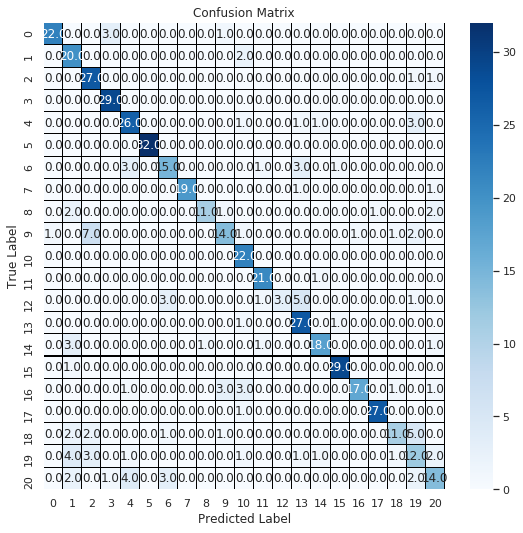

In [0]:
import seaborn as sns
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 5 ) Evaluating the Model Performance

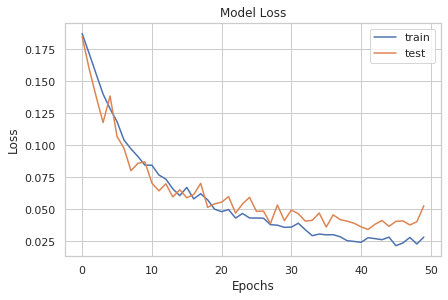

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

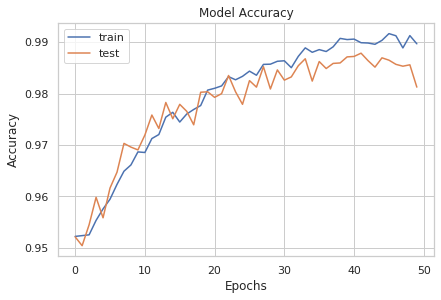

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()